# Machine Learning Crash Course - ML Concepts

_Author: Eda AYDIN_

This notebook is created using [Google Developers - Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/ml-intro) video, and course materials.

**Table of Contents**

1. [Introduction to ML](#i1)
2. [Framing](#2)
3. [Descending into ML](#3)
4. [Reducing Loss](#4)
5. [First Steps with TF](#5)
6. [Generalization](#6)
7. [Training and Test Sets](#7)
8. [Validation Set](#8)
9. [Representation](#9)
10. [Feature Crosses](#10)
11. [Regularization: Simplicity](#11)
12. [Logistic Regression](#12)
13. [Classification](#13)
14. [Regularization: Sparsity](#14)
15. [Neural Networks](#15)
16. [Training Neural Nets](#16)
17. [Multi-Class Neural Nets](#17)
18. [Embeddings](#18)

## Introduction to ML  <a class="anchor" id="1"></a>

What you learn here will allow you, as a software engineer, to do three things better.
- Reduce time programming
- Customize and scale products
- Complete seemingly "unprogrammable" tasks

## Framing <a class="anchor" id="2"></a>

### What is (Supervised) Machine Learning?

ML systems learn how to combine input to produce useful predictions on never-before-seen data.

_**Terminology**: Labels and Features_

- **Label** is the variable we're predicting
    - Typically, represented by the variable **y** in simple linear regression
    - It's the target that we're trying to predict.
        - _Example_: The label could be 
            -the future price of wheat, 
            the kind of animal shown in a picture, 
            the meaning of an audio clip, or just about anything.

- **Feature**
    - Typically, represented by the variables *${x_{1},x_{2}, x_{3}, .. x_{n}}$* in simple linear regression
    - The features are the way that we represent our data.
        - _Example_: In the spam detector example, the features could include the following:
            - words in the email text
            - sender's address
            - time of data the email was sent
            - email contains the phrase "one weird trick"


**Examples**

- **Example** is a particular instance of data, **x**
- **Labeled example** has {features, label}: {**x,y**)
    - Used to train the model
    - In our spam detector example, the labeled examples would be individual emails that users have explicitly marked as "spam" or "not spam."
- **Unlabeled example** has {features, ?}: (**x,y**)
    - Used for making predictions on new data

**Models**
- A model defines the relationship between features and label.
- **Model** maps examples to predicted labels: **y'**
    - Defined by internal parameters, which are learned
    - **Training** means creating or **learning** the model. That is, you show the model labeled examples and enable the model to gradually learn the relationships between features and label.
    - **Inference** means applying the trained model to unlabeled examples. That is, you use the trained model to make useful predictions (**y'**). For example, during inference, you can predict **medianHouseValue** for new unlabeled examples.

**Regression vs. Classification**

- A **regression** model predicts continuous data. For example, regression models make predictions that answer
questions like the following:
    - What is the value of a house in California?
    - What is the probability that a user will click on this ad?

- A **classification** model predicts discrete values. For example, classification models make predictions that
answer
questions like the following:
    - Is a given email message spam or not spam?
    - Is this an image of a dog, a cat, or a hamster?

In [3]:
import pandas as pd

df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Framing: Check Your Understanding

**Suppose you want to develop a supervised machine learning model to predict whether a given email is "spam" or "not spam." Which of the following statements are true?**

- Emails not marked as "spam" or "not spam" are unlabeled examples.
    - Because our label consists of the values "spam" and "not spam", any email not yet marked as spam or not spam is an unlabeled example.
- The labels applied to some examples might be unreliable.
    - Definitely. It's important to check how reliable your data is. The labels for this dataset probably come from email users who mark particular email messages as spam. Since most users do not mark every suspicious email message as spam, we may have trouble knowing whether an email is spam. Furthermore, spammers could intentionally poison our model by providing faulty labels.
    

**Suppose an online shoe store wants to create a supervised ML model that will provide personalized shoe recommendations to users. That is, the model will recommend certain pairs of shoes to Marty and different pairs of shoes to Janet. The system will use past user behavior data to generate training data. Which of the following statements are true?**

- "Shoe size" is a useful feature.
    - "Shoe size" is a quantifiable signal that likely has a strong impact on whether the user will like the recommended shoes. For example, if Marty wears size 9, the model shouldn't recommend size 7 shoes.
- "The user clicked on the shoe's description" is a useful label.
    - Users probably only want to read more about those shoes that they like. Clicks by users is, therefore, an observable, quantifiable metric that could serve as a good training label. Since our training data derives from past user behavior, our labels need to derive from objective behaviors like clicks that strongly correlate with user preferences.

## Descending into ML <a class="anchor" id="3"></a>

**Linear Regression** is a method for finding the straight line or hyperplane that best fits a set of points. This module explores linear regression intuitively before laying the groundwork for a machine learning approach to linear regression.

- **Doğrusal regresyon**, bir dizi noktaya en iyi uyan düz çizgiyi veya hiperdüzlemi bulma yöntemidir. Bu modül, lineer regresyona yönelik bir makine öğrenimi yaklaşımı için zemin hazırlamadan önce lineer regresyonu sezgisel olarak araştırır.

*A Convenient Loss Function For Regression*

**$L_{2}\,$  Loss** for a given example is also called squared error
- = Square of the difference between prediction and label
- = $(observation - prediction)^{2}$
- = $(y - y')^{2}$

*Defining $L_{2}\,$ Loss on a Data Set*

$$L_{2}\,Loss\,=\,\sum_{(x,y)	\in D}^{}(y-prediction(x))^2$$

$\sum$ : We're summing over all examples in the training set.
$D$: Sometimes useful to average over all examples, so divide by $||D||$.

It has long been known that crickets (an insect species) chirp more frequently on hotter days than on cooler days. For decades, professional and amateur scientists have cataloged data on chirps-per-minute and temperature. As a birthday gift, your Aunt Ruth gives you her cricket database and asks you to learn a model to predict this relationship. Using this data, you want to explore this relationship.

First, examine your data by plotting it:

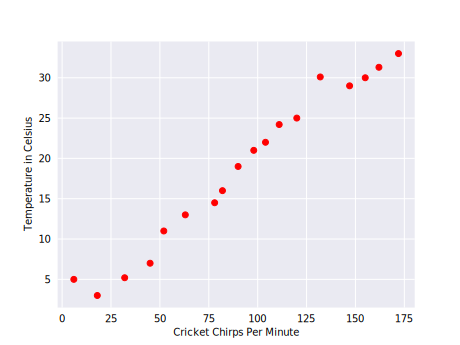

In [1]:
from IPython.display import SVG

SVG(filename="CricketPoints.svg")

As expected, the plot shows the temperature rising with the number of chirps. Is this relationship between chirps and temperature linear? Yes, you could draw a single straight line like the following to approximate this relationship:



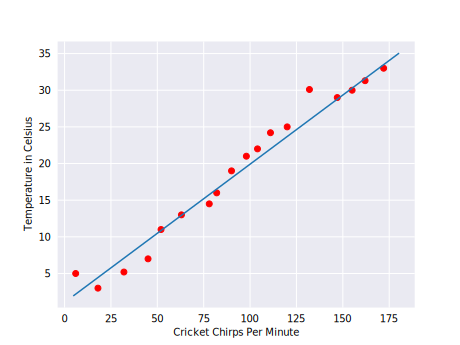

In [2]:
SVG(filename="CricketLine.svg")

True, the line doesn't pass through every dot, but the line does clearly show the relationship between chirps and temperature. Using the equation for a line, you could write down this relationship as follows:

$$y\,=mx\,+\,b$$

where,

- $y$ is the temperature in Celsius - the value we're trying to predict
- $m$ is the slope of the line.
- $x$ is the number of chirps per minute - the value of our input feature.
- $b$ is the y-intercept.

By convention in machine learning, you'll write the equation for a model slightly differently:

$${y}'\,=b\,+\,w_{1}x_{1}$$

where:

- ${y}'$ is the predicted label (a desired output)
- $b$ is the bias (the y-intercept), sometimes referred to as $w_{0}$.
- $w_{1}$ is the weight of feature 1. Weight is the same concept as the "slope" $m$ in he traditional equation of a line.
- $x_{1}$ is a feature (a known input).

To infer (predict) the temperature ${y}'$ for a new chirps-per-minute value $x_{1}, just substitute the $x_{1}  value into this model.

Although this model uses only one feature, a more sophisticated model might rely on multiple features, each having a separate weight ($w_{1}$,$w_{2}$,etc.). . For example, a model that relies on three features might look as follows:

$${y}'\,=b\,+\,w_{1}x_{1}+\,w_{2}x_{2}+\,w_{3}x_{3}$$

_Training and Loss_

**Training** a model simply means learning (determining) good values for all the weights and the bias from labeled examples. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss; this process is called **empirical risk minimization**.

Loss is the penalty for a bad prediction. That is, **loss** is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater. The goal of training a model is to find a set of weights and biases that have _low_ loss, on average, across all examples. For example, Figure 3 shows a high loss model on the left and a low loss model on the right. Note the following about the figure:

- The arrows represent loss.
- The blue lines represent predictions.

------

**Bir modeli eğitmek**, basitçe, etiketlenmiş örneklerden tüm ağırlıklar ve önyargılar için iyi değerleri öğrenmek (belirlemek) anlamına gelir. Denetimli öğrenmede, bir makine öğrenimi algoritması, birçok örneği inceleyerek ve kaybı en aza indiren bir model bulmaya çalışarak bir model oluşturur; bu sürece **ampirik risk minimizasyonu** denir.

Kayıp, kötü bir tahminin cezasıdır. Yani, **kayıp**, modelin tahmininin tek bir örnekte ne kadar kötü olduğunu gösteren bir sayıdır. Modelin tahmini mükemmelse kayıp sıfırdır; aksi takdirde kayıp daha büyüktür. Bir modeli eğitmenin amacı, tüm örneklerde ortalama olarak _düşük_ kayıp olan bir dizi ağırlık ve önyargı bulmaktır. Örneğin, Şekil 3, solda yüksek kayıplı bir modeli ve sağda düşük kayıplı bir modeli göstermektedir. Şekil hakkında aşağıdakilere dikkat edin:

- Oklar kaybı temsil ediyor.
- Mavi çizgiler tahminleri temsil etmektedir.

<div>
<img src="LossSideBySide.png",width="500"/>
</div>

Notice that the arrows in the left plot are much longer than their counterparts in the right plot. Clearly, the line in the right plot is a much better predictive model than the line in the left plot.

You might be wondering whether you could create a mathematical function—a loss function—that would aggregate the individual losses in a meaningful fashion.

----

Sol çizimdeki okların, sağdaki çizimdeki karşılıklarından çok daha uzun olduğuna dikkat edin. Açıkça, sağdaki çizimdeki çizgi, soldaki çizimdeki çizgiden çok daha iyi bir tahmin modelidir.

Bireysel kayıpları anlamlı bir şekilde toplayacak bir matematiksel fonksiyon – bir kayıp fonksiyonu – oluşturup oluşturamayacağınızı merak ediyor olabilirsiniz.

_Mean Square Error(MSE)_

It is the average squared loss per example over the whole dataset. To calculate MSE, sum up all the squared losses for individual examples and then divide by the number of examples:

$$MSE\,=\,\frac{1}{N}\,\sum_{(x,y)	\in D}^{}(y-prediction(x))^2$$

where:

- $(x,y)$ is an example in which
    - $x$ is the set of features (for example, chirps/minute, age, gender) that the model uses to make predictions.
    - $y$ is the example's label (for example, temperature)
- $prediction(x)$ is a function of the weights and bias in combination with the set of features $x$.
- $D$ is a data set containing many labeled examples, which are $(x,y)$ pairs.
- $N$ is the number of examples in $D$.

-----
**`Although MSE is commonly-used in machine learning, it is neither the only practical loss function nor the best loss function for all circumstances.`**

-----
**`MSE, makine öğreniminde yaygın olarak kullanılmasına rağmen, ne tek pratik kayıp işlevi ne de tüm koşullar için en iyi kayıp işlevidir.`**

## Reducing Loss  <a class="anchor" id="4"></a>

**How do we choose the set of model parameters that minimizes it?**
- One way to get a direction is to compute the gradient.
    - The derivative of the loss function with respect to the model parameters.
    - For simple loss functions like square loss the derivative is easy to compute, it gives us an efficient way to update model parameters.

**How does it work?**
- Data comes in, we compute the gradient of the loss function on that data. The negative gradient tells us in which direction to update model parameters in order to reduce loss. We take a step in that direction, get a new version of the model, and now we can recompute the gradient and repeat.

If **learning rate is really small** then we'll take a bunch of tiny gradient steps, requiring a lot of computation in order to reach the minimum.

If **learning rate is very large** then we'll take a large step in the direction of negative gradient. Potentially overshooting the local minimum and even reaching a point in which the loss is even bigger than before.

**How do we reduce loss?**
- Hyperparameters are the configuration settings used to tune how the model is trained.
- Derivative of $(y-{y}')^2$ with respect to the weights and biases tells us how loss changes for a given example.
    - Simple to compute and convex.
- So we repeatedly take small steps in the direction that minimizes loss
    - We call these **Gradient Steps**


_Weight Initialization_

- For convex problems, weights can start anywhere (say all 0s)
    - Convex: think of a bowl shape
    - Just one minimum
- Foreshadowing: not true for neural nets
    - Non-convex: think of an egg crate
    - More than one minimum

_An Iterative Approach_

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

_Gradient Descent_

The gradient always points in the direction of steepest increase in the loss function. The gradient descent algorithm takes a step in the direction of the negative gradient in order to reduce loss as quickly as possible.

_Learning Rate_

**Hyperparameters** are the knobs that programmers tweak in machine learning algorithms. Most machine learning programmers spend a fair amount of time tuning the learning rate. If you pick a learning rate that is too small, learning will take too long:

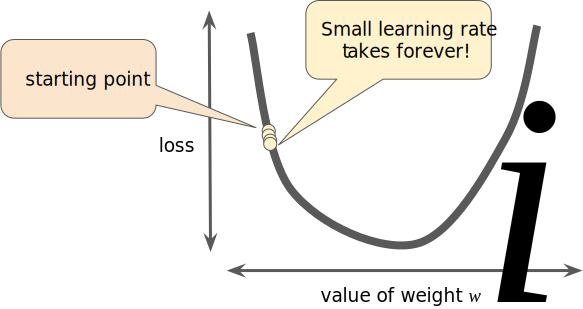

In [7]:
SVG(filename="LearningRateTooSmall.svg")


Conversely, if you specify a learning rate that is too large, the next point will perpetually bounce haphazardly across the bottom of the well like a quantum mechanics experiment gone horribly wrong:

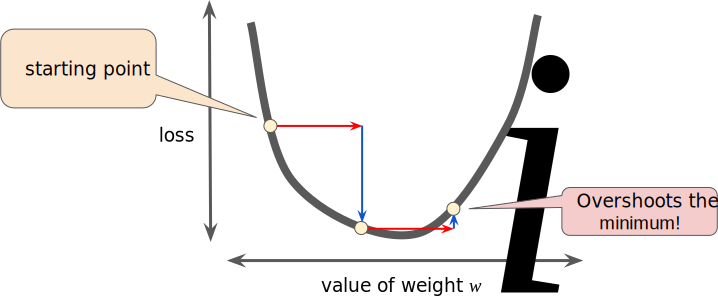

In [8]:
SVG(filename="LearningRateTooLarge.svg")

There's a Goldilocks learning rate for every regression problem. The Goldilocks value is related to how flat the loss function is. If you know the gradient of the loss function is small then you can safely try a larger learning rate, which compensates for the small gradient and results in a larger step size.

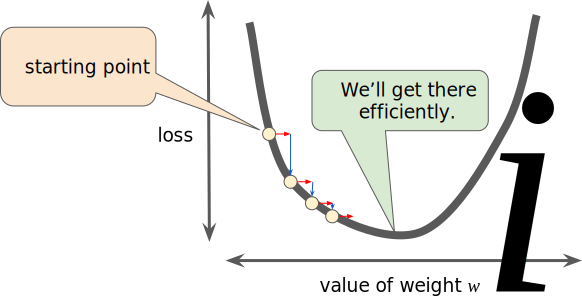

In [9]:
SVG(filename="LearningRateJustRight.svg")


_SGD & Mini-Batch Gradient Descent_
- Could compute gradient over entire data set on each step, but this turns out to be unnecessary
- Computing gradient on small data samples works well
    - On every step, get a new random sample
- **Stochastic Gradient Descent**: one example at a time
    - If they compute the gradient of the loss function over a single example that mostly works too. Even though they'd have to take more overall steps,the amount of total computation in order to reach a good solution is often much smaller.
- **Mini-Batch Gradient Descent**: batches of 10-1000
    - Rather than use one example or the entire data set, we use a small batch, somewhere between ten and a thousand examples to perform our steps.
    - Loss & gradients are averaged over the batch
    - Mini-batch SGD reduces the amount of noise in SGD but is still more efficient than full-batch.

## Introduction to TensorFlow <a class="anchor" id="5"></a>

TensorFlow is an end-to-end open source platform for machine learning. TensorFlow is a rich system for managing all aspects of a machine learning system; however, this class focuses on using a particular TensorFlow API to develop and train machine learning models.

TensorFlow APIs are arranged hierarchically, with the high-level APIs built on the low-level APIs. Machine learning researchers use the low-level APIs to create and explore new machine learning algorithms. In this class, you will use a high-level API named tf.keras to define and train machine learning models and to make predictions. tf.keras is the TensorFlow variant of the open-source Keras API.

-----

TensorFlow, makine öğrenimi için uçtan uca bir açık kaynak platformudur. TensorFlow, bir makine öğrenimi sisteminin tüm yönlerini yönetmek için zengin bir sistemdir; ancak bu sınıf, makine öğrenimi modellerini geliştirmek ve eğitmek için belirli bir TensorFlow API'sini kullanmaya odaklanır.

TensorFlow API'leri, düşük seviyeli API'ler üzerine inşa edilmiş yüksek seviyeli API'ler ile hiyerarşik olarak düzenlenir. Makine öğrenimi araştırmacıları, yeni makine öğrenimi algoritmaları oluşturmak ve keşfetmek için düşük seviyeli API'leri kullanır. Bu derste, makine öğrenmesi modellerini tanımlamak, eğitmek ve tahminler yapmak için tf.keras adlı üst düzey bir API kullanacaksınız. tf.keras, açık kaynaklı Keras API'sinin TensorFlow varyantıdır.